# Importing the Data

In [38]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical market data for the last 5 years
nifty50_data = yf.download("^NSEI", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [39]:
nifty50_data['Yearly Return'] = nifty50_data['Close'].pct_change(periods=252) * 100
nifty50_data['50-Day MA'] = nifty50_data['Close'].rolling(window=50).mean()
nifty50_data['200-Day MA'] = nifty50_data['Close'].rolling(window=200).mean()

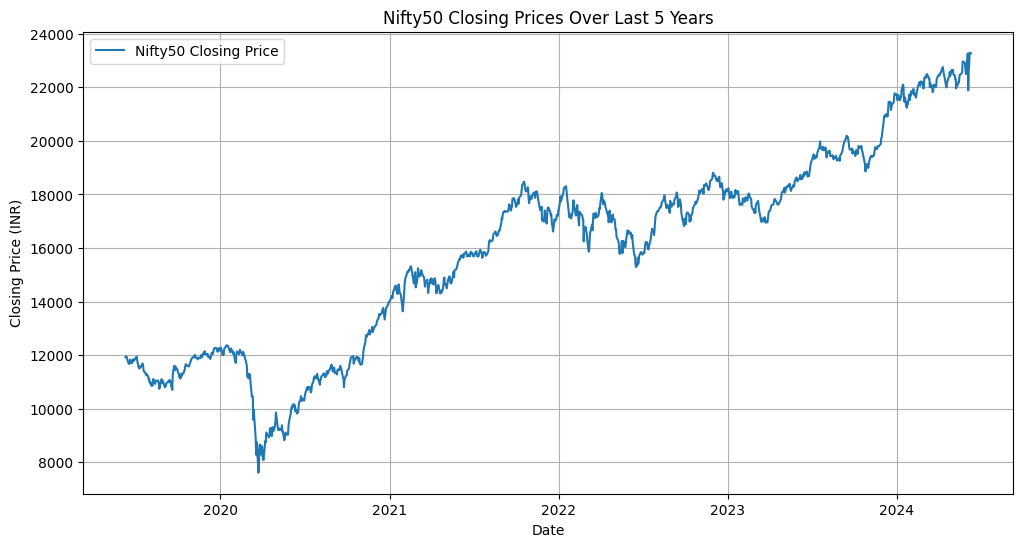

In [40]:
# Perform a simple analysis - plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
plt.title('Nifty50 Closing Prices Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Moving Average Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.plot(nifty50_data.index, nifty50_data['50-Day MA'], label='50-Day Moving Average')
# plt.plot(nifty50_data.index, nifty50_data['200-Day MA'], label='200-Day Moving Average')
# plt.title('Nifty50 Closing Prices with 50-Day and 200-Day Moving Averages')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# Yearly Returns Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Yearly Return'], label='Nifty50 Yearly Return')
# plt.title('Nifty50 Yearly Returns Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Yearly Return (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

## Cleaning and Pre processing

In [42]:
if 'Dividends' in nifty50_data.columns and 'Stock Splits' in nifty50_data.columns:
    nifty50_data = nifty50_data.drop(columns=['Dividends', 'Stock Splits'])

In [43]:
nifty50_data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Yearly Return    252
50-Day MA         49
200-Day MA       199
dtype: int64

In [44]:
nifty50_data['50-Day MA'] = nifty50_data['50-Day MA'].dropna(inplace=True)
nifty50_data['200-Day MA'] = nifty50_data['200-Day MA'].dropna(inplace=True)